In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from numpy.linalg import matrix_rank
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from numpy.linalg import matrix_rank

# Load the dataset
file_path = "/content/Custom_CNN_Features.csv"
df = pd.read_csv(file_path)

# Data types of attributes
print("Data Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())






Data Types:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
 Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


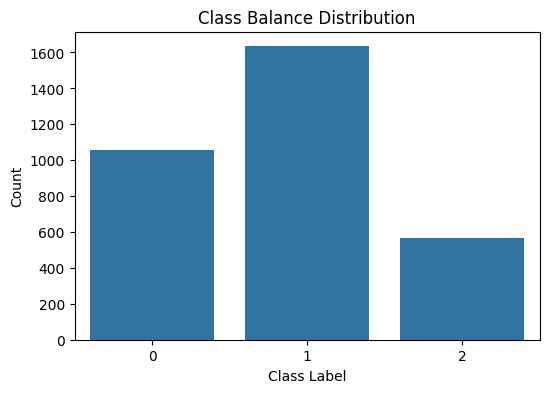

In [4]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Class Label"])
plt.title("Class Balance Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


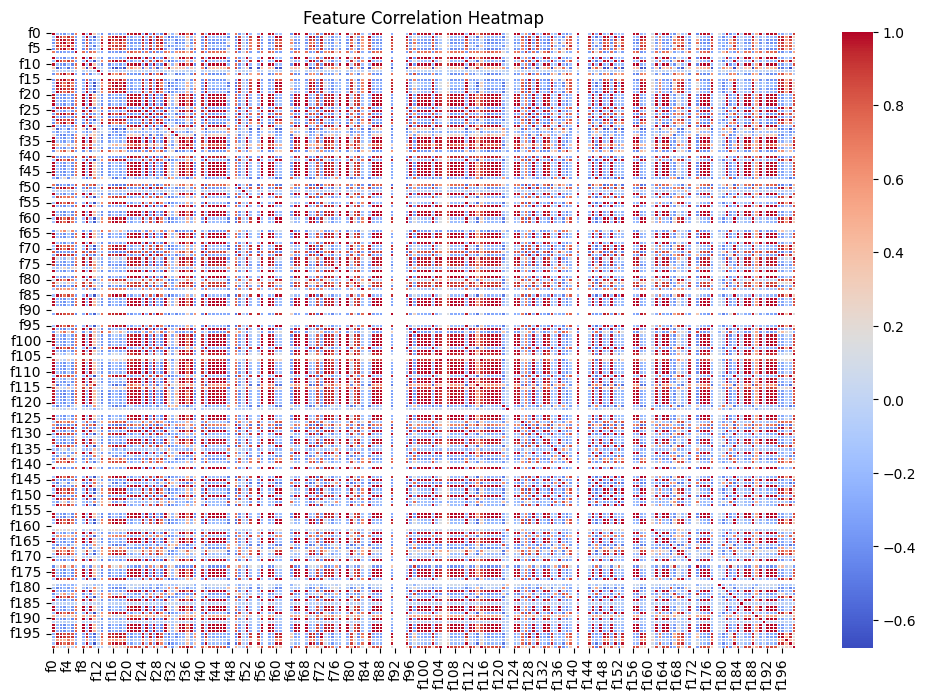

In [5]:
# Compute correlation matrix (excluding non-numeric columns)
corr_matrix = df.drop(columns=["Filename", "Class Label"]).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Compute rank of feature matrix (excluding 'Filename' and 'Class Label')
feature_matrix = df.drop(columns=["Filename", "Class Label"]).values
rank = matrix_rank(feature_matrix)

print(f"Matrix Rank: {rank} (out of {feature_matrix.shape[1]} features)")


Matrix Rank: 174 (out of 200 features)


In [9]:
scaler = MinMaxScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])  # Normalizing feature columns
print("Feature normalization complete. Data is scaled between 0 and 1.")


Feature normalization complete. Data is scaled between 0 and 1.


# Q2


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
file_path = "/content/Custom_CNN_Features.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
X = df.drop(columns=["Filename", "Class Label"])  # Features
y = df["Class Label"]  # Target variable

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Initialize classifiers
models = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": GaussianNB()
}

# Store results
results = []

for name, model in models.items():
    start_time = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Compute AUROC only if there are at least two classes in y_test
    if y_prob is not None and len(set(y_test)) > 1:
        auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
    else:
        auc = "N/A"

    end_time = time.time()
    time_taken = end_time - start_time

    # Store results
    results.append([name, accuracy, precision, recall, f1, auc, time_taken])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "Time Taken"])

# Display results
print(results_df)


           Model  Accuracy  Precision    Recall  F1-Score     AUROC  \
0            kNN  0.936118   0.938236  0.936118  0.935982  0.971410   
1  Decision Tree  0.886978   0.888091  0.886978  0.886977  0.907139   
2            SVM  0.947174   0.949097  0.947174  0.947030  0.978626   
3  Random Forest  0.943489   0.945297  0.943489  0.943422  0.982880   
4    Naïve Bayes  0.931204   0.932606  0.931204  0.931328  0.965391   

   Time Taken  
0    0.252095  
1    0.638848  
2    1.767814  
3    1.808878  
4    0.034853  


# Q3

           Model  Train Accuracy  Test Accuracy   Fit Status
0            kNN        0.944649       0.936118  Regular Fit
1  Decision Tree        1.000000       0.890663      Overfit
2            SVM        0.927429       0.947174  Regular Fit
3  Random Forest        1.000000       0.941032  Regular Fit
4    Naïve Bayes        0.913899       0.931204  Regular Fit


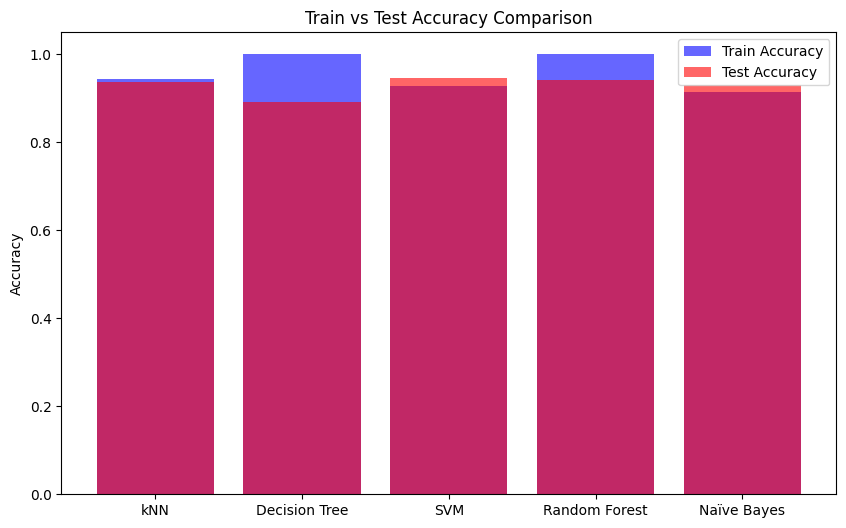

In [14]:
# Train and evaluate models
train_results = []
test_results = []
overfit_status = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_results.append(train_acc)
    test_results.append(test_acc)

    # Determine overfitting or underfitting
    if train_acc > 0.95 and train_acc - test_acc > 0.10:
        status = "Overfit"
    elif train_acc < 0.80 and test_acc < 0.80:
        status = "Underfit"
    else:
        status = "Regular Fit"

    overfit_status.append(status)

# Create a DataFrame for comparison
fit_results_df = pd.DataFrame({
    "Model": models.keys(),
    "Train Accuracy": train_results,
    "Test Accuracy": test_results,
    "Fit Status": overfit_status
})

# Print the results
print(fit_results_df)

# Plot train vs test accuracy
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), train_results, color='blue', alpha=0.6, label='Train Accuracy')
plt.bar(models.keys(), test_results, color='red', alpha=0.6, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy Comparison")
plt.legend()
plt.show()

# Q4

In [13]:
# Sort results by time taken
results_df_sorted = results_df.sort_values(by="Time Taken", ascending=True)
print(results_df_sorted)


           Model  Accuracy  Precision    Recall  F1-Score     AUROC  \
4    Naïve Bayes  0.931204   0.932606  0.931204  0.931328  0.965391   
0            kNN  0.936118   0.938236  0.936118  0.935982  0.971410   
1  Decision Tree  0.886978   0.888091  0.886978  0.886977  0.907139   
2            SVM  0.947174   0.949097  0.947174  0.947030  0.978626   
3  Random Forest  0.943489   0.945297  0.943489  0.943422  0.982880   

   Time Taken  
4    0.034853  
0    0.252095  
1    0.638848  
2    1.767814  
3    1.808878  


# REPORT:
From the above comparison, Support Vector Machine (SVM) is the best choice due to its highest test accuracy (94.72%), strong generalization ability (regular fit), high precision, recall, and F1-score, and a robust AUROC score. While it has a higher computation time than Naïve Bayes, it provides significantly better accuracy and is worth using for this classification task.